<a href="https://colab.research.google.com/github/AfroozHaghbin/Optimization/blob/main/Afrooz_Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This python code is written to estimate a function f(x) from function category of d*x^3+e*x^2+f*x+g by a line m*x+c over the interval [a,b]
This code is written to get the initial values of m and c, step size alpha and estimation interval [a,b] from the user
Please enter the value of a: -2
Please enter the value of b: 2
Please enter the value of step size alpha: 0.01
Please enter the initial value of m: 0
Please enter the initial value of c: 0
This code receive the coefficient d, e, f, and g from the user to define the fucntion f(x)
Please enter the value of d: -1
Please enter the value of e: 0
Please enter the value of f: 3
Please enter the value of g: 0



Estimation of function -1.0*x**3 + 3.0*x using linear estimator 0.599970667930217*x over the interval [ -2.0 , 2.0 ]
The initial values are m(0)= 0.0 and c(0)= 0.0
The step size is equal to 0.01
The Final value of m is equal to 0.599970667930217
The Final value of c is equal to 0.0


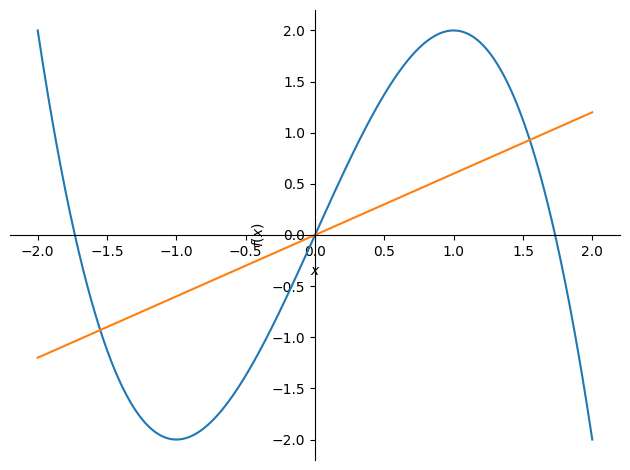

In [ ]:
from scipy.integrate import quad
import numpy as np
import sympy as sp

#This python code is written to estimate a function f(x) from function category of d*x^3+e*x^2+f*x+g by a line m*x+c over the interval [a,b]
#This code receive the coefficient d, e, f, and g from the user to define the fucntion f(x)
#This code is written to get the initial values of m and c, step size alpha and estimation interval [a,b] from the user

#Defining some functions to be estimated
def func_category(x, d, e, f, g):
    return d*x**3 + e*x**2 + f*x + g

#Defining linear and quadratic functions as estimators
def est_category(x, n, m, c):
  return n*x**2 + m*x + c


print("This python code is written to estimate a function f(x) from function category of d*x^3+e*x^2+f*x+g by a line m*x+c over the interval [a,b]")
print("This code is written to get the initial values of m and c, step size alpha and estimation interval [a,b] from the user")

user_a = input("Please enter the value of a: ")
user_b = input("Please enter the value of b: ")
user_alpha = input("Please enter the value of step size alpha: ")
user_initial_m = input("Please enter the initial value of m: ")
user_initial_c = input("Please enter the initial value of c: ")
print("This code receive the coefficient d, e, f, and g from the user to define the fucntion f(x)")
user_d = input("Please enter the value of d: ")
user_e = input("Please enter the value of e: ")
user_f = input("Please enter the value of f: ")
user_g = input("Please enter the value of g: ")
print("\n\n")

#Defining interval
a = float(user_a)
b = float(user_b)


#Defining the function to be estimated e.g. f(x)=x^2
d = float(user_d)
e = float(user_e)
f = float(user_f)
g = float(user_g)

#Defining the linear estimator function mx+c
n = 0

#Defining the cost function
x,m,c = sp.symbols('x m c')
cost_function = (func_category(x,d,e,f,g)-est_category(x,n,m,c))**2

#Cost function derivation
integrand1 = cost_function.diff(m)
integrand2 = cost_function.diff(c)

# Convert symbolic expressions to numerical functions using lambdify
integrand1_num = sp.lambdify([x, m, c], integrand1)
integrand2_num = sp.lambdify([x, m, c], integrand2)

# Define a function to perform the integration
def integrate_func(func, a, b, m_val, c_val):
  return quad(lambda x: func(x, m_val, c_val), a, b)

m_val = [0]
c_val = [0]
gradient1 = [0]
gradient2 = [0]

#initial values with m=1 and c=2
m_val[0] = float(user_initial_m)
c_val[0] = float(user_initial_c)
gradient1[0] = integrate_func(integrand1_num, a, b, m_val[0], c_val[0])[0]
gradient2[0] = integrate_func(integrand2_num, a, b, m_val[0], c_val[0])[0]

#gradient descent
step_size = float(user_alpha)
Max_iteration = 1000000
Min_error = 0.0000001
ii = 0;
while (gradient1[ii]**2+gradient2[ii]**2)>Min_error :
  ii = ii+1
  m_val.append(m_val[ii-1] - step_size*gradient1[ii-1])
  c_val.append(c_val[ii-1] - step_size*gradient2[ii-1])
  gradient1.append(integrate_func(integrand1_num, a, b, m_val[ii], c_val[ii])[0])
  gradient2.append(integrate_func(integrand2_num, a, b, m_val[ii], c_val[ii])[0])


print("Estimation of function", func_category(x,d,e,f,g), "using linear estimator", est_category(x,n,m_val[ii],c_val[ii]),"over the interval [", a, ",", b,"]")
print("The initial values are m(0)=", m_val[0], "and c(0)=", c_val[0])
print("The step size is equal to", step_size)
print("The Final value of m is equal to", m_val[ii])
print("The Final value of c is equal to", c_val[ii])

sp.plot((func_category(x,d,e,f,g), (x, a, b)),(est_category(x,n,m_val[ii],c_val[ii]), (x, a, b)))
